# Otsu Threshold

Otsu thresholding is a technique in image processing to convert a grayscale image into a binary image. The main idea is to automatically find a threshold (a cutoff point) that separates the pixels into two groups: background and foreground (usually dark and light).

It does this by maximizing the difference (or variance) between the two groups, making the foreground (the object) stand out clearly from the background.

## The method works as follows:

### Histogram analysis: 
It looks at the intensity values of the image and creates a histogram that shows how many pixels fall into each intensity range (from black to white).

### Threshold selection: 
The algorithm tries different possible threshold values and calculates how good each one is at separating the image into two parts: background and foreground. It picks the one that makes the two groups as different as possible.

### Explanation:

1. Histogram creation: We first create a histogram of the pixel intensities.
2. Loop through thresholds: We then iterate through all possible thresholds from 0 to 255.
3. Maximize variance: For each threshold, we calculate the between-class variance. The threshold that maximizes this variance is selected.
4. Apply threshold: Finally, we apply the selected threshold to create the binary image.

In [ ]:
# Import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:

# Otsu thresholding function
def otsu_thresholding(image):
    
    # Get the image histogram
    histogram = np.zeros(256)
    for pixel in image.flatten():
        histogram[pixel] += 1

    # Total number of pixels
    total_pixels = image.size
    current_max = 0
    threshold = 0

    # Weighted sum of the num of pixels per gray level
    sum_total = 0
    for i in range(256):
        sum_total += i * histogram[i]

    # initialize variables
    sum_background = 0
    weight_background = 0
    weight_foreground = 0

    # Loop through differnt threshold values
    for i in range(256):

        # Assume the back ground
        weight_background += histogram[i]
        if weight_background == 0:
            continue
        
        # So the foreground will be total - background
        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break
        
        # weighted sum of the background pixels till current threshold 
        sum_background += i * histogram[i]
        # Average intensity values of background pixels 
        mean_background = sum_background / weight_background
        # Average intensity values of the foreground pixels
        mean_foreground = (sum_total - sum_background) / weight_foreground

        # Calculate between-class variance
        variance_between = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Check if we have found a new max variance between classes
        if variance_between > current_max:
            current_max = variance_between
            threshold = i

    # Apply threshold to the image
    binary_image = (image >= threshold).astype(np.uint8) * 255

    return threshold, binary_image


<function matplotlib.pyplot.show(close=None, block=None)>

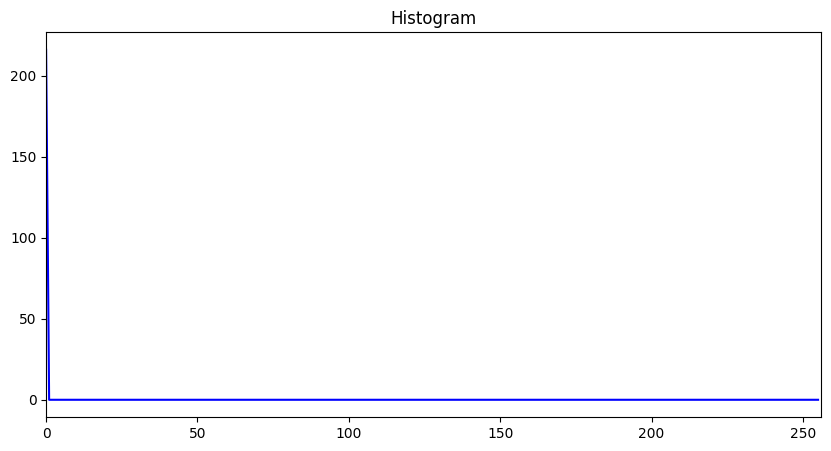

In [15]:

# Example usage with OpenCV to read and display the image
image = cv2.imread('images.jpg', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist(image, [0], None, [256], [0, 256])
plt.figure(figsize=(10, 5))
plt.title("Histogram")
plt.plot(hist, color="b")
plt.xlim([0, 256])
plt.show

Threshold Value:36.00


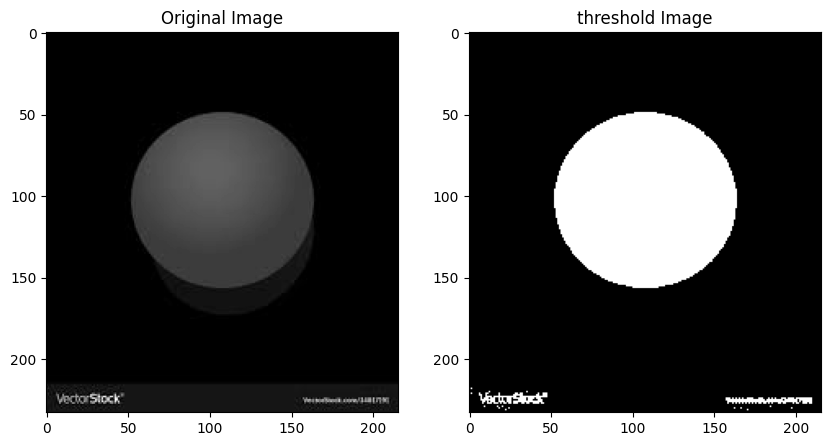

In [16]:

threshold, binary_image = otsu_thresholding(image)
print("Threshold Value:%.2f"%threshold)
# Display the original and inverted images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("threshold Image")
plt.imshow(binary_image, cmap='gray')

plt.show()
